# **<u>Mini Project 5 </u>**

## Basic Machine Learning Model:


### Step 1: Import necessary libraries

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Step 2: Load the cleaned dataset (replace with your path)

In [4]:
df = pd.read_csv("cleaned_data_wrangling_project.CSV")

###  Step 3: Select features (X) and target (y)

In [8]:
# Encode categorical columns
df['high_value_order'] = df['high_value_order'].map({'Yes': 1, 'No': 0})
df['returned?'] = df['returned?'].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})

# Features and target
X = df[['sales', 'quantity_ordered', 'high_value_order']]
y = df['returned?']


### Step 4 — Split Dataset

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)

### Step 5 — Train the Model

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 6 — Predictions

In [15]:
y_pred = model.predict(X_test)

### Step 7 — Evaluate

In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Step 8 — Feature Importance

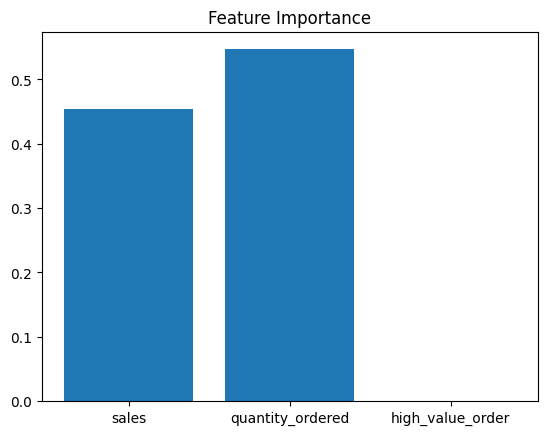

In [17]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.title("Feature Importance")
plt.show()


## Machine Learning Model Building (Intermediate Level)

### Step 1 — Import Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

### Step 2 — Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 3 — Create a Pipeline
The pipeline will:

- Scale features (important if features have different ranges)
- Run Random Forest model
- Apply grid search for best hyperparameters

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])


### Step 4 — Hyperparameter Tuning with GridSearchCV

In [21]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,           # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [None, 5, ...], 'rf__min_samples_split': [2, 5, ...], 'rf__n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


### Step 5 — Best Parameters

In [22]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}


### Step 6 — Evaluate on Test Data

In [23]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Step 10 — Feature Importance

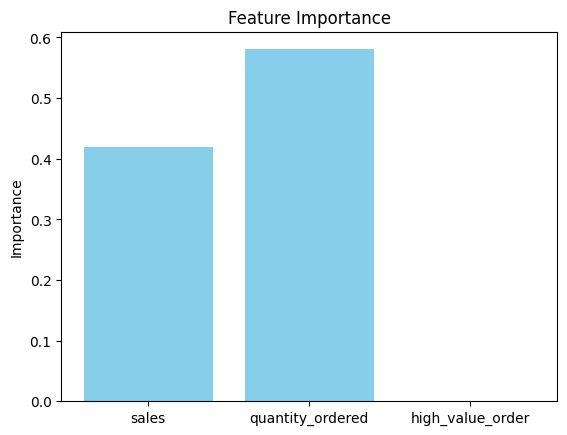

In [24]:
import matplotlib.pyplot as plt

# Extract feature importances from the best Random Forest model
importances = best_model.named_steps['rf'].feature_importances_

plt.bar(X.columns, importances, color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()
